# KNN binary classification
orange, grapefruits

1. data preparation

In [ ]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import tensorflow as tf
import keras

SEED = 42

In [ ]:
!pip install --q ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00
time: 361 µs (started: 2024-06-28 07:04:06 +00:00)


In [ ]:
np.random.seed(SEED) # seed는 셀 안에서만 고정이다
np.random.random()

0.3745401188473625

time: 6.87 ms (started: 2024-06-28 07:04:06 +00:00)


In [ ]:
citrus = pd.read_csv('citrus.csv')
citrus.info()
citrus.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


(10000, 6)

time: 58.3 ms (started: 2024-06-28 07:04:06 +00:00)


In [ ]:
citrus.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


time: 30.3 ms (started: 2024-06-28 07:04:06 +00:00)


In [ ]:
df = citrus.copy() # 원본 데이터는 유지하기 위함. 판다스에서는 그냥 copy 써도 깊은 복사임. 얕은 복사 하고 싶으면 deep 파라미터 사용하기.

time: 1.85 ms (started: 2024-06-28 07:04:06 +00:00)


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diameter,10000.0,9.975685,1.947844,2.96,8.46,9.980,11.4800,16.45
weight,10000.0,175.050792,29.212119,86.76,152.22,174.985,197.7225,261.51
red,10000.0,153.847800,10.432954,115.00,147.00,154.000,161.0000,192.00
green,10000.0,76.010600,11.708433,31.00,68.00,76.000,84.0000,116.00
blue,10000.0,11.363200,9.061275,2.00,2.00,10.000,17.0000,56.00


time: 38.5 ms (started: 2024-06-28 07:04:06 +00:00)


# 범주형 데이터

In [ ]:
df['name'].nunique() # 고유한 데이터의 개수를 반환함. 그래서 몇개의 카테고리로 이루어져 있는지 확인할 수 있음.

2

time: 5.24 ms (started: 2024-06-28 07:04:07 +00:00)


In [ ]:
df['name'].value_counts() # 데이터가 어느 쪽에 치우치지 않았나 보기 위해서

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

time: 8.04 ms (started: 2024-06-28 07:04:07 +00:00)


<Axes: xlabel='name'>

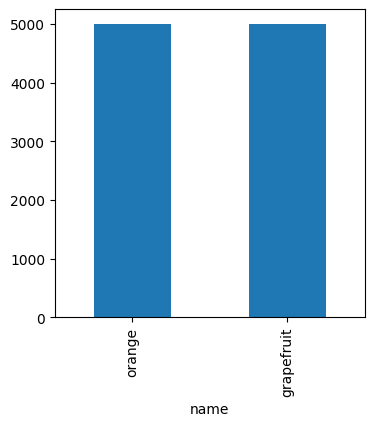

time: 563 ms (started: 2024-06-28 07:04:07 +00:00)


In [ ]:
df['name'].value_counts().plot(kind='bar', figsize=(4,4))

# 연속형 변수

(array([  2.,   0.,   0.,   0.,   0.,   1.,   3.,   1.,   1.,   2.,   4.,
          5.,   9.,   9.,   7.,  12.,  11.,  14.,  14.,  28.,  25.,  25.,
         23.,  38.,  42.,  49.,  49.,  54.,  57.,  46.,  79.,  80., 117.,
        102.,  95., 117., 130., 140., 122., 127., 141., 140., 165., 164.,
        138., 170., 167., 127., 165., 134., 138., 140., 137., 127., 115.,
         94., 105., 109.,  93.,  83.,  76.,  95.,  78.,  62.,  55.,  49.,
         51.,  38.,  32.,  27.,  29.,  17.,  25.,  15.,  11.,  10.,   7.,
          5.,   6.,   2.,   2.,   1.,   3.,   4.,   1.,   0.,   1.,   1.,
          0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([ 86.76  ,  88.2033,  89.6466,  91.0899,  92.5332,  93.9765,
         95.4198,  96.8631,  98.3064,  99.7497, 101.193 , 102.6363,
        104.0796, 105.5229, 106.9662, 108.4095, 109.8528, 111.2961,
        112.7394, 114.1827, 115.626 , 117.0693, 118.5126, 119.9559,
        121.3992, 122.8425, 124.2858, 125.7291

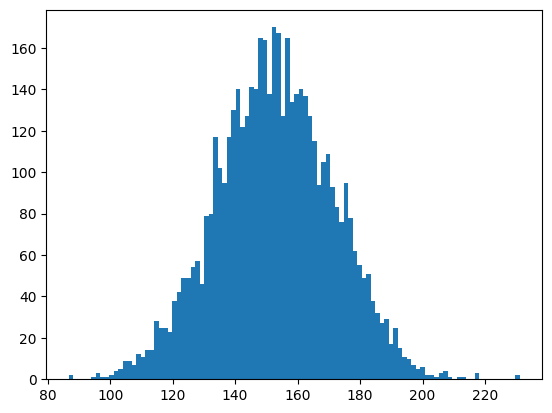

time: 598 ms (started: 2024-06-28 07:04:07 +00:00)


In [ ]:
df_orange = df[df['name'] == 'orange']
plt.hist(df_orange['weight'], bins=100) # 100개의 간격으로 나눠 준다

In [ ]:
df_citrus = df[df['name'] != 'orange']
df_citrus.head()

,name,diameter,weight,red,green,blue
5000,grapefruit,7.63,126.79,150,74,24
5001,grapefruit,7.69,133.98,150,43,15
5002,grapefruit,7.72,135.56,150,54,21
5003,grapefruit,7.77,135.62,150,75,15
5004,grapefruit,7.84,136.63,149,77,20


time: 25 ms (started: 2024-06-28 07:04:08 +00:00)


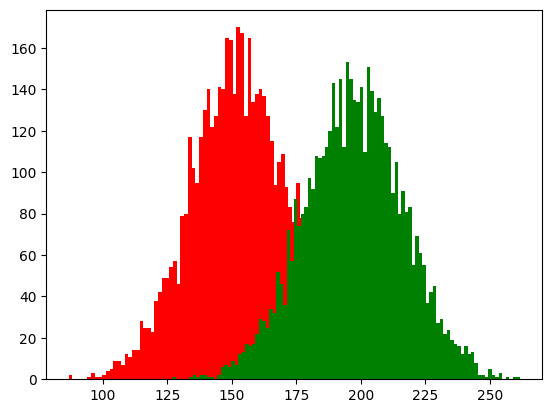

time: 689 ms (started: 2024-06-28 07:04:08 +00:00)


In [ ]:
plt.hist(df_orange['weight'], color= 'r', bins=100)
plt.hist(df_citrus['weight'], color= 'g', bins=100)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x790091cf2c50>,
 'caps': [<matplotlib.lines.Line2D at 0x790091cf3190>,
 'boxes': [<matplotlib.lines.Line2D at 0x790091cf29b0>,
 'medians': [<matplotlib.lines.Line2D at 0x790091cf36d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x790091cf3970>,
 'means': []}

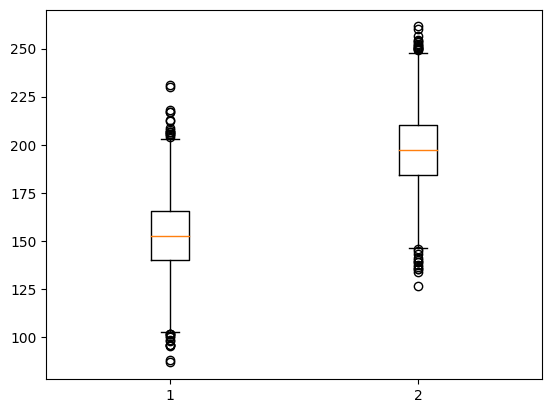

time: 238 ms (started: 2024-06-28 07:04:08 +00:00)


In [ ]:
plt.boxplot([df_orange['weight'], df_citrus['weight']])

In [ ]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

time: 3.56 ms (started: 2024-06-28 07:04:09 +00:00)


{'whiskers': [<matplotlib.lines.Line2D at 0x790091d879a0>,
 'caps': [<matplotlib.lines.Line2D at 0x790091d87ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x790091d87820>,
 'medians': [<matplotlib.lines.Line2D at 0x790091db8460>,
 'fliers': [<matplotlib.lines.Line2D at 0x790091db8700>,
 'means': []}

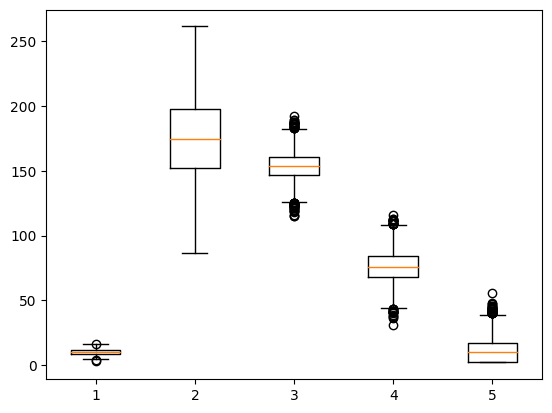

time: 366 ms (started: 2024-06-28 07:04:09 +00:00)


In [ ]:
plt.boxplot(df[['diameter', 'weight', 'red', 'green', 'blue']]) # 연속형 변수들의 이상치가 있나 확인하기 위해 boxplot을 찍어본다

# missing value

In [ ]:
df.isna().sum(axis=0) # 결측치 확인

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

time: 7.15 ms (started: 2024-06-28 07:04:09 +00:00)


In [ ]:
df.duplicated().sum() # 중복치 확인

0

time: 9.87 ms (started: 2024-06-28 07:04:09 +00:00)


In [ ]:
df = df.sample(frac=1) # 데이터의 편중을 막기 위해 데이터끼리 섞어줌 1이면 전부를, 0.5면 전체중 반을 무작위로 골라서 섞어줌.
df.head()

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2


time: 56.2 ms (started: 2024-06-28 07:04:09 +00:00)


In [ ]:
idx_train = int(len(df) * 0.6) # 6:2:2로 나눠서 학습
idx_val = int(len(df) * 0.8)

time: 754 µs (started: 2024-06-28 07:04:09 +00:00)


In [ ]:
train = df.iloc[:idx_train,:]
val = df.iloc[idx_train:idx_val,:]
test = df.iloc[idx_val:,:]
print(train.shape, val.shape, test.shape)

(6000, 6) (2000, 6) (2000, 6)
time: 8.81 ms (started: 2024-06-28 07:04:09 +00:00)


## X, y 변수 분리

In [ ]:
X_train = train.drop('name', axis=1)
y_train = train['name']
X_val = val.drop('name', axis=1)
y_val = val['name']

time: 13 ms (started: 2024-06-28 07:04:09 +00:00)


In [ ]:
y_train.value_counts(), y_val.value_counts()

(name
 orange        3062
 grapefruit    2938
 Name: count, dtype: int64,
 name
 grapefruit    1042
 orange         958
 Name: count, dtype: int64)

time: 20.7 ms (started: 2024-06-28 07:04:09 +00:00)


스케일링

In [ ]:
X_train.head()

,diameter,weight,red,green,blue
6252,10.66,184.37,166,60,18
4684,10.40,181.34,166,109,13
1731,7.99,145.45,150,72,2
4742,10.55,182.99,151,84,2
4521,10.10,177.31,160,72,2


time: 41.6 ms (started: 2024-06-28 07:04:09 +00:00)


In [ ]:
u = X_train.mean(); u

diameter      9.933920
weight      174.431958
red         154.092833
green        76.101833
blue         11.238000
dtype: float64

time: 9.12 ms (started: 2024-06-28 07:04:09 +00:00)


In [ ]:
std = X_train.std(); std

diameter     1.949700
weight      29.219868
red         10.514798
green       11.764135
blue         8.991412
dtype: float64

time: 8.65 ms (started: 2024-06-28 07:04:09 +00:00)


In [ ]:
u, std

(diameter      9.933920
 weight      174.431958
 red         154.092833
 green        76.101833
 blue         11.238000
 dtype: float64,
 diameter     1.949700
 weight      29.219868
 red         10.514798
 green       11.764135
 blue         8.991412
 dtype: float64)

time: 7.55 ms (started: 2024-06-28 07:04:09 +00:00)


In [ ]:
X_train_s = (X_train - u) / std
X_val_s = (X_val - u) / std # 원시적인 방법의 standard scaling

time: 12.2 ms (started: 2024-06-28 07:04:10 +00:00)


In [ ]:
ss_dic = {'mean': u, 'std': std}
ss_dic

{'mean': diameter      9.933920
 weight      174.431958
 red         154.092833
 green        76.101833
 blue         11.238000
 dtype: float64,
 'std': diameter     1.949700
 weight      29.219868
 red         10.514798
 green       11.764135
 blue         8.991412
 dtype: float64}

time: 13.7 ms (started: 2024-06-28 07:04:10 +00:00)


# 인코딩

In [ ]:
label_dict = {'orange':0, 'grapefruit':1}

time: 623 µs (started: 2024-06-28 07:04:10 +00:00)


In [ ]:
y_train_e = y_train.map(label_dict)
y_val_e = y_val.map(label_dict) # 그냥 이렇게만 하면 알아서 저거에 맞게 인코딩이 됨.

time: 11 ms (started: 2024-06-28 07:04:10 +00:00)


In [ ]:
X_train_s = X_train_s.to_numpy()
X_val_s = X_val_s.to_numpy()
y_train_e = y_train_e.to_numpy()
y_val_e = y_val_e.to_numpy() # 계산을 위해서는 ndarray로 변경을 해야 함.

# X_train_s = X_tran_s.values 로도 numpy array로 변경 가능함.

time: 1.89 ms (started: 2024-06-28 07:04:10 +00:00)


# 모델 학습

In [ ]:
X_train_s.shape, y_train_e.shape

((6000, 5), (6000,))

time: 8.84 ms (started: 2024-06-28 07:04:10 +00:00)


In [ ]:
from keras import layers

# 여기서부터 달라지는 부분이다.
# 이진분류 이므로 마지막 레이어 출력값은 1임. input shape와 output shape가 중요. 그리고 보통 이진분류는 sigmoid 사용

model = keras.Sequential (
    [
      layers.Dense(units=12, activation= 'relu', input_shape=(X_train.shape[1],)),
      layers.Dense(units=8, activation= 'relu'),
      layers.Dense(units=4, activation= 'relu'),
      layers.Dense(units=1, activation= 'sigmoid')
    ]
)

time: 281 ms (started: 2024-06-28 07:04:56 +00:00)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                72        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 217 (868.00 Byte)
Trainable params: 217 (868.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 42.8 ms (started: 2024-06-28 07:05:07 +00:00)


In [ ]:
model.compile(
    loss='binary_crossentropy', # 이진 분류
    optimizer='adam',
    metrics=['accuracy']
)

time: 56 ms (started: 2024-06-28 07:05:28 +00:00)


In [ ]:
epochs = 100
batch_size = 16

history = model.fit(
    X_train_s, y_train_e,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_s, y_val_e) # validation 데이터를 나눠놨으므로 이렇게. 아닐 때에는 validation_split = 0.2 이용한다
)

Epoch 1/100
375/375 [==============================] - 3s 3ms/step - loss: 0.3695 - accuracy: 0.8572 - val_loss: 0.1943 - val_accuracy: 0.9225
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1874 - accuracy: 0.9257 - val_loss: 0.1827 - val_accuracy: 0.9270
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1805 - accuracy: 0.9295 - val_loss: 0.1807 - val_accuracy: 0.9275
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1785 - accuracy: 0.9283 - val_loss: 0.1813 - val_accuracy: 0.9255
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1779 - accuracy: 0.9287 - val_loss: 0.1803 - val_accuracy: 0.9280
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1769 - accuracy: 0.9287 - val_loss: 0.1799 - val_accuracy: 0.9280
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1761 - accuracy: 0.9282 - val_loss: 0.1794 - val_accuracy: 0.9290

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 1.18 ms (started: 2024-06-28 07:08:18 +00:00)


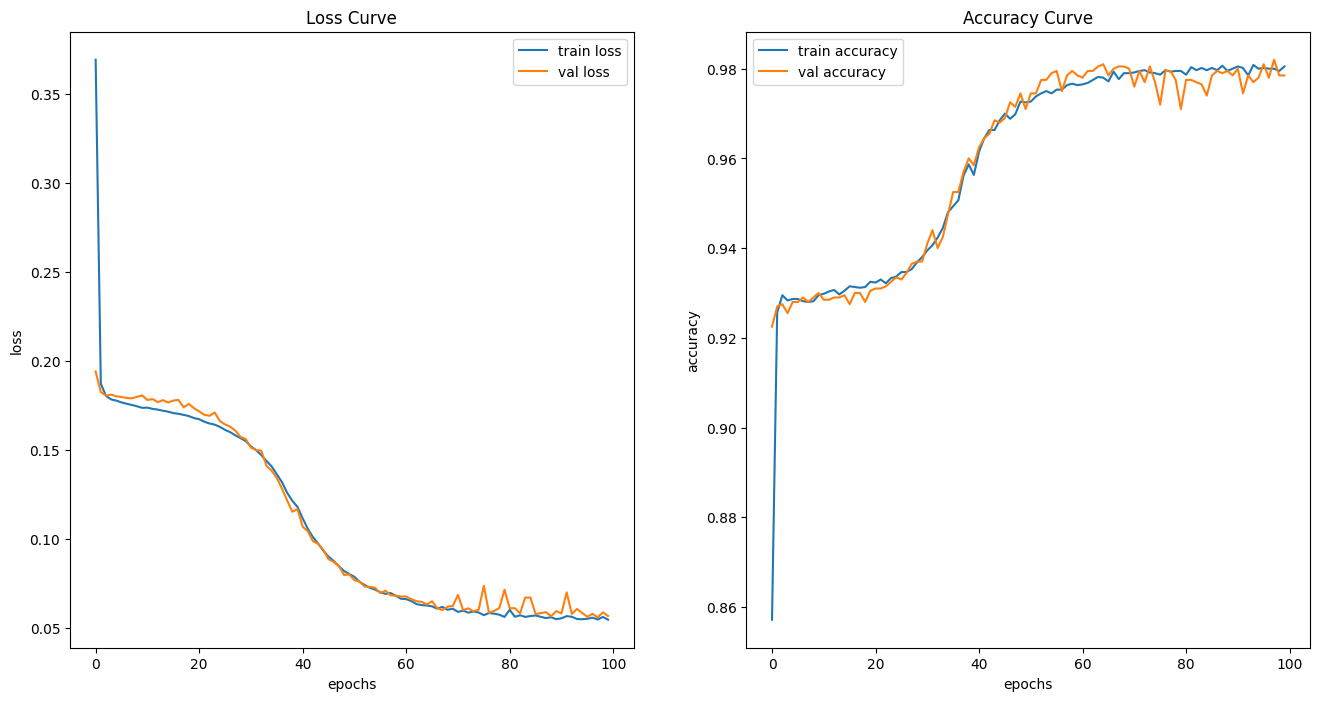

time: 1.31 s (started: 2024-06-28 07:08:25 +00:00)


In [ ]:
plot_history(history)

# 그래프를 해석하는 법. 훈련 손실은 너무 아래로 가면 과적합일 수 있으나 검증 손실이 같이 가면 상관 없음.
# 정확도 곡선은 위로 올라갈 수록 좋다.

In [ ]:
X_test = test.drop('name', axis=1)
y_test = test['name']
X_test_s = (X_test - u) / std # 원시적인 방법으로 스케일링 해주고
y_test_e = y_test.map(label_dict)  # 라벨 인코딩도 원시적인 방법으로 조져줌
X_test_s = X_test_s.to_numpy() # 그리고 ndarray로 변환

time: 10.7 ms (started: 2024-06-28 07:09:30 +00:00)


In [ ]:
y_pred = model.predict(X_test_s) # 학습한 데이터를 가지고 테스트 값을 예측해본다

63/63 [==============================] - 0s 3ms/step
time: 458 ms (started: 2024-06-28 07:09:51 +00:00)


In [ ]:
y_pred = (y_pred > 0.5).astype(int) # 정확도 확률이 0.5 이상이면 1, 아니면 0으로 바꿔주고
y_pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

time: 11.9 ms (started: 2024-06-28 07:10:03 +00:00)


In [ ]:
y_pred = y_pred.reshape(-1) # shape 변경 후에
y_pred

array([0, 1, 1, ..., 1, 1, 0])

time: 3.83 ms (started: 2024-06-28 07:10:30 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# 여기서 실제 값과 비교를 해준다
print(f'accuracy : {accuracy_score(y_test_e, y_pred)}')
print(f'precision : {precision_score(y_test_e, y_pred)}')
print(f'recall : {recall_score(y_test_e, y_pred)}')
print(f'f1 : {f1_score(y_test_e, y_pred)}')

accuracy : 0.979
precision : 0.9639468690702088
recall : 0.996078431372549
f1 : 0.9797492767598843
time: 26.8 ms (started: 2024-06-28 07:11:14 +00:00)


<Axes: >

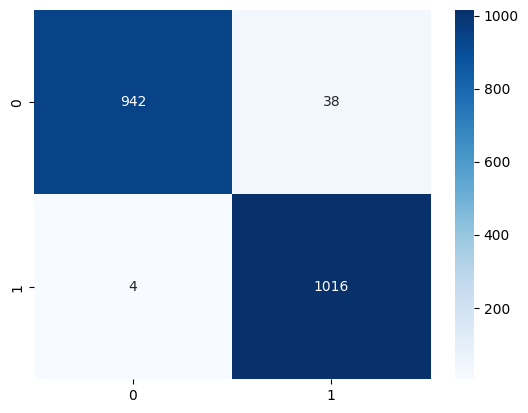

time: 389 ms (started: 2024-06-28 07:11:34 +00:00)


In [ ]:
sns.heatmap(confusion_matrix(y_test_e, y_pred), annot=True, cmap= 'Blues', fmt='d')